### Final Log-Likelihood and Coverage Plots

##### Updated - Umar Siddique 13/07/25

Changes:
- 13/07: Added 1D plots for c1.

Adapted via: https://github.com/rmastand/nsbi_for_dihiggs

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pickle

import scienceplots
plt.style.use("science")

from helpers.test_statistics import get_errorbands, get_errorbands_local_min
from helpers.likelihood_visualizers import make_c_grid, c_scan_1d, c_scan_2d, c_scan_3d, c_scan_3d_with_confusion

In [2]:
import yaml
with open("workflow.yaml", "r") as file:
    workflow = yaml.safe_load(file)
    
dpi = 300

# 1D

# Test statistic

In [3]:
# Generate 1D plots for c0 or c1 parameter codes
parameter_code = "c0"  # Change this to "c1" for c1 plots

# Define test sets and descriptions for each parameter code
parameter_configs = {
    "c0": {
        "test_sets": ['sm', 'alt_c0_m10', 'alt_c0_m6', 'alt_c0_m4', 'alt_c0_p1'],
        "descriptions": {
            'sm': 'Standard Model',
            'alt_c0_m10': 'c0 = -1.0',
            'alt_c0_m6': 'c0 = -0.6', 
            'alt_c0_m4': 'c0 = -0.4',
            'alt_c0_p1': 'c0 = +0.1'
        }
    },
    "c1": {
        "test_sets": ['sm', 'alt_c1_m16', 'alt_c1_m8', 'alt_c1_m4', 'alt_c1_p8'],
        "descriptions": {
            'sm': 'Standard Model',
            'alt_c1_m16': 'c1 = -1.6',
            'alt_c1_m8': 'c1 = -0.8',
            'alt_c1_m4': 'c1 = -0.4', 
            'alt_c1_p8': 'c1 = +0.8'
        }
    }
}

# Get configuration for the selected parameter code
config = parameter_configs[parameter_code]
test_sets = config["test_sets"]
test_set_descriptions = config["descriptions"]

print(f"Generating 1D plots for {parameter_code} with {len(test_sets)} test sets: {test_sets}")

# Load data for all test sets
all_results = {}

for test_set in test_sets:
    print(f"\nLoading data for {test_set} ({test_set_descriptions[test_set]})")
    
    results_dict = {}
    
    with open(f"preplot_pickles/results_dict_rate_only_{parameter_code}.pkl", "rb") as f:
        temp = pickle.load(f)
        results_dict["Rate only"] = temp[test_set]
        c_scans = temp["cscans"]
    
    with open(f"preplot_pickles/results_dict_all_{parameter_code}_f1.pkl", "rb") as f:
        results_dict["1 obs."] = pickle.load(f)[test_set]
    
    with open(f"preplot_pickles/results_dict_all_{parameter_code}_f3.pkl", "rb") as f:
        results_dict["3 obs."] = pickle.load(f)[test_set]
    
    with open(f"preplot_pickles/results_dict_all_{parameter_code}_f5.pkl", "rb") as f:
        results_dict["5 obs."] = pickle.load(f)[test_set]
    
    # Store results for this test set
    all_results[test_set] = {
        "results_dict": results_dict,
        "c_scans": c_scans,
        "description": test_set_descriptions[test_set]
    }

print(f"\nCompleted data loading for all {len(test_sets)} test sets")

Generating 1D plots for c0 with 5 test sets: ['sm', 'alt_c0_m10', 'alt_c0_m6', 'alt_c0_m4', 'alt_c0_p1']

Loading data for sm (Standard Model)

Loading data for alt_c0_m10 (c0 = -1.0)

Loading data for alt_c0_m6 (c0 = -0.6)

Loading data for alt_c0_m4 (c0 = -0.4)

Loading data for alt_c0_p1 (c0 = +0.1)

Completed data loading for all 5 test sets



Generating 1D plot for sm (Standard Model)
  Plotting Rate only
    Lefts -12.380, Rights -11.660
    Lefts -0.500, Rights 0.220
  Plotting 1 obs.
    Lefts -0.500, Rights 0.040
  Plotting 3 obs.
    Lefts -0.140, Rights 0.580


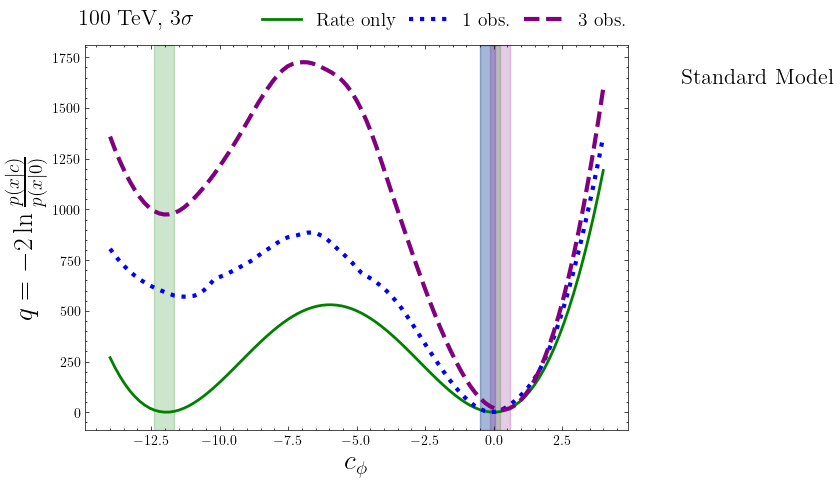



Generating 1D plot for alt_c0_m10 (c0 = -1.0)
  Plotting Rate only
    Lefts -10.580, Rights -9.500
    Lefts -2.660, Rights -1.580
  Plotting 1 obs.
    Lefts -10.940, Rights -10.400
  Plotting 3 obs.
    Lefts -10.580, Rights -10.040


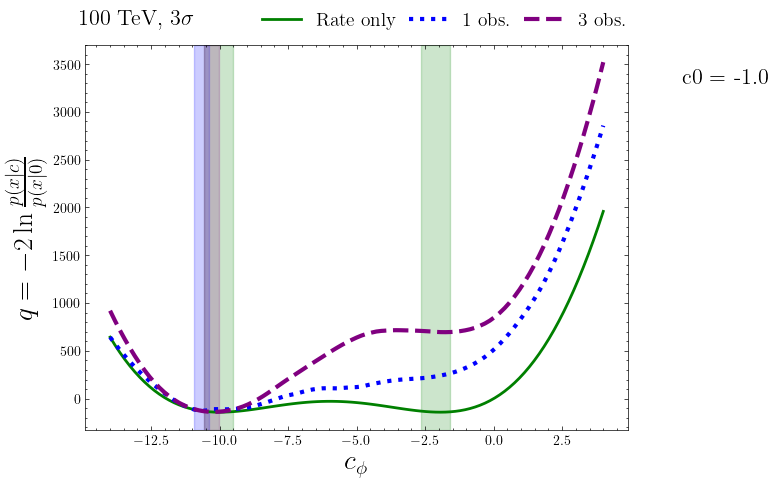



Generating 1D plot for alt_c0_m6 (c0 = -0.6)
  Plotting Rate only
    Lefts -8.060, Rights -4.100
  Plotting 1 obs.
    Lefts -5.900, Rights -4.820
  Plotting 3 obs.
    Lefts -6.440, Rights -5.360


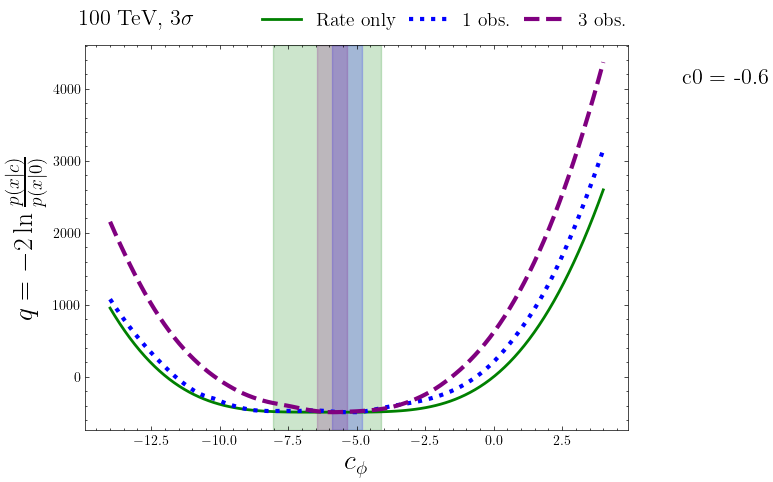



Generating 1D plot for alt_c0_m4 (c0 = -0.4)
  Plotting Rate only
    Lefts -8.780, Rights -6.260
    Lefts -5.900, Rights -3.200
  Plotting 1 obs.
    Lefts -5.180, Rights -4.640
  Plotting 3 obs.
    Lefts -4.280, Rights -3.560


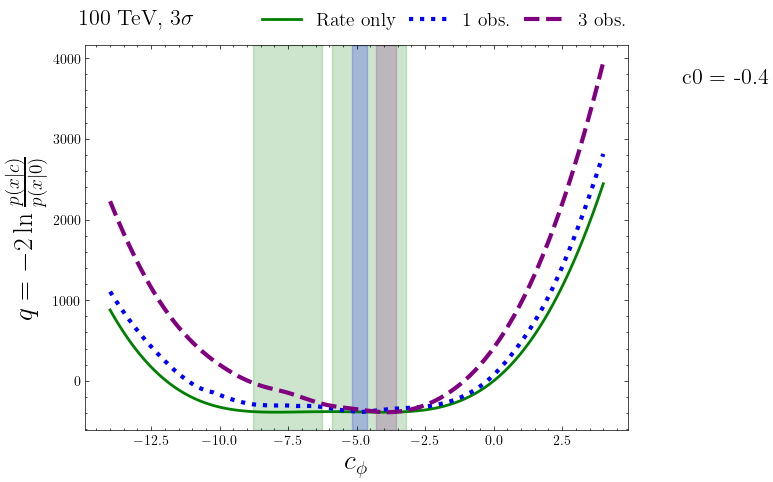



Generating 1D plot for alt_c0_p1 (c0 = +0.1)
  Plotting Rate only
    Lefts -13.280, Rights -12.740
    Lefts 0.580, Rights 1.300
  Plotting 1 obs.
    Lefts 0.400, Rights 1.300
  Plotting 3 obs.
    Lefts 0.940, Rights 1.480


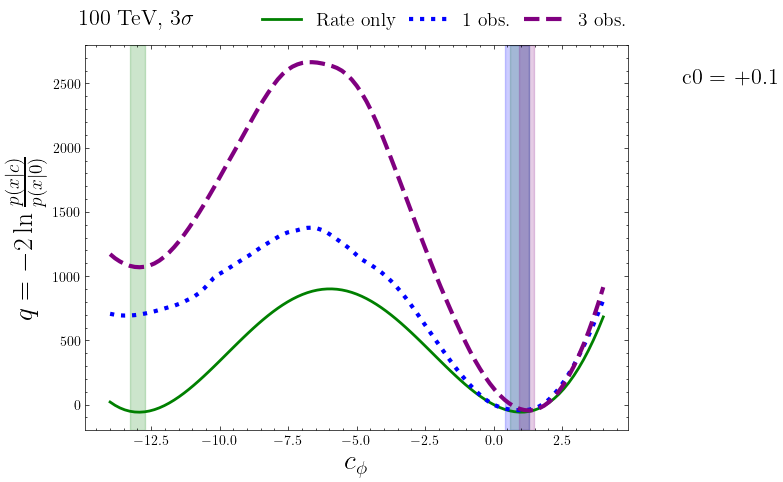



Completed generating all 5 1D plots for c0


In [4]:
# Generate 1D plots for all test sets
results_to_plot = ["Rate only", "1 obs.", "3 obs."]

style_dicts = {
    "Rate only":{"color":"green","linestyle":"solid","lw":2},
    "1 obs.":{"color":"blue","linestyle":"dotted","lw":3},
    "3 obs.":{"color":"purple","linestyle":"dashed","lw":3},
    "5 obs.":{"color":"orange","linestyle":"dashed","lw":3},
}

fontsize = 14

# Loop through all test sets and generate plots
for test_set, test_data in all_results.items():
    print(f"\nGenerating 1D plot for {test_set} ({test_data['description']})")
    
    # Extract data for this test set
    results_dict = test_data["results_dict"]
    c_scans = test_data["c_scans"]
    description = test_data["description"]
    
    # Calculate confidence levels
    CL_all_dict = {}
    plotting_cscan = 10*c_scans[int(parameter_code[-1])]
    
    for test in results_to_plot:
        CL_all_dict[test] = get_errorbands_local_min(results_dict[test], sigma = 3)
    
    # Create the plot
    plt.figure(figsize = (7,5))
    
    for i, test in enumerate(results_to_plot):
        print(f"  Plotting {test}")
        plt.plot(plotting_cscan, -results_dict[test], label = test, **style_dicts[test])
        
        if len(CL_all_dict[test][0]) > len(CL_all_dict[test][1]):
            CL_all_dict[test][1].append(99)
        
        # Add confidence intervals
        for j in range(len(CL_all_dict[test][0])):
            print(f"    Lefts {plotting_cscan[CL_all_dict[test][0][j]]:.3f}, Rights {plotting_cscan[CL_all_dict[test][1][j]]:.3f}")
            plt.axvspan(plotting_cscan[CL_all_dict[test][0][j]], plotting_cscan[CL_all_dict[test][1][j]],
                       color = style_dicts[test]["color"], alpha = 0.2)
    
    # Add labels and formatting
    plt.legend(fontsize = fontsize, loc = "upper right", bbox_to_anchor=(1.03, 1.13), ncol = 3, columnspacing=0.6)
    
    plt.text(-.01, 1.05, "100 TeV, 3$\sigma$", transform=plt.gca().transAxes, fontsize = fontsize+2)
    plt.text(1.1, .9, description, transform=plt.gca().transAxes, fontsize = fontsize+2)
    
    plt.xlabel(workflow["plotting"]["fancy_name"][parameter_code], fontsize = fontsize+6)
    plt.ylabel("$q=-2\ln\\frac{p(x|c)}{p(x|0)}$", fontsize = fontsize+6)
    
    # Save and show plot
    plt.savefig(f"plots/{parameter_code}_{test_set}_100TeV_f5.pdf", dpi = dpi)
    plt.show()
    
    plt.close()
    print()

print(f"\nCompleted generating all {len(all_results)} 1D plots for {parameter_code}")


# Coverage

In [5]:
# Generate coverage plots for the current parameter_code (c0 or c1)
# Use the same parameter_code as defined in the 1D section
n_coverage = 20

# Get the current parameter configuration
config = parameter_configs[parameter_code]
test_sets = config["test_sets"]
test_set_descriptions = config["descriptions"]

print(f"Generating coverage plots for parameter_code: {parameter_code}")

# Check what test sets are available in coverage data
print("Checking available test sets in coverage data...")
try:
    with open(f"preplot_pickles/coverage_dict_rate_only_{parameter_code}.pkl", "rb") as f:
        temp = pickle.load(f)
        available_coverage_sets = [key for key in temp.keys() if key != "cscans"]
        print(f"Available test sets in coverage data: {available_coverage_sets}")
except FileNotFoundError:
    print(f"Coverage data file not found for {parameter_code}. Skipping coverage plots.")
    available_coverage_sets = []

# Filter test_sets to only include those available in coverage data
coverage_sets = [test_set for test_set in test_sets if test_set in available_coverage_sets]
print(f"Coverage plots will be generated for: {coverage_sets}")

if not coverage_sets:
    print("No coverage test sets available. Skipping coverage plots.")
else:
    print(f"Generating coverage plots for {len(coverage_sets)} test sets")

    # Load coverage data for available test sets
    all_coverage = {}

    for test_set in coverage_sets:
        print(f"\nLoading coverage data for {test_set} ({test_set_descriptions[test_set]})")
        
        results_dict = {}
        
        with open(f"preplot_pickles/coverage_dict_rate_only_{parameter_code}.pkl", "rb") as f:
            temp = pickle.load(f)
            results_dict["Rate only"] = temp[test_set]
            c_scans = temp["cscans"]
        
        with open(f"preplot_pickles/coverage_dict_all_{parameter_code}_f1.pkl", "rb") as f:
            results_dict["1 feat."] = pickle.load(f)[test_set]
        
        with open(f"preplot_pickles/coverage_dict_all_{parameter_code}_f3.pkl", "rb") as f:
            results_dict["3 feat."] = pickle.load(f)[test_set]
        
        with open(f"preplot_pickles/coverage_dict_all_{parameter_code}_f5.pkl", "rb") as f:
            results_dict["5 feat."] = pickle.load(f)[test_set]
        
        # Store results for this test set
        all_coverage[test_set] = {
            "results_dict": results_dict,
            "c_scans": c_scans,
            "description": test_set_descriptions[test_set]
        }

    print(f"\nCompleted loading coverage data for all {len(coverage_sets)} test sets")

Generating coverage plots for parameter_code: c0
Checking available test sets in coverage data...
Available test sets in coverage data: ['sm']
Coverage plots will be generated for: ['sm']
Generating coverage plots for 1 test sets

Loading coverage data for sm (Standard Model)

Completed loading coverage data for all 1 test sets



Generating coverage plot for sm (Standard Model)


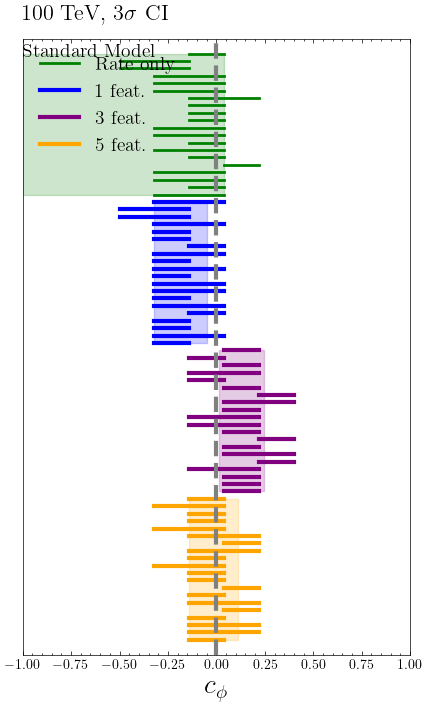


Completed generating coverage plots for c0


In [6]:
# Generate coverage plots for available test sets
if coverage_sets:  # Only proceed if coverage data is available
    fontsize = 14

    style_dicts = {
        "Rate only":{"color":"green","linestyle":"solid","lw":2},
        "1 feat.":{"color":"blue","linestyle":"solid","lw":3},
        "3 feat.":{"color":"purple","linestyle":"solid","lw":3},
        "5 feat.":{"color":"orange","linestyle":"solid","lw":3},
    }

    def plotting_helper(CL_output, test, i, y_position, plot_label = True):
        low_to_high, high_to_low = CL_output
        if (len(low_to_high) > len(high_to_low)) or len(high_to_low) == 0:
                high_to_low.append(100)
        if len(low_to_high) < len(high_to_low):
            low_to_high.append(0)
        for j in range(len(low_to_high)):       
            if j == 0 and plot_label: label = test 
            else: label = None
            plt.plot([plotting_cscan[low_to_high[j]], plotting_cscan[high_to_low[j]]], [y_position, y_position], label = label, **style_dicts[test])
        y_position -= 1
        return y_position, plotting_cscan[low_to_high[0]], plotting_cscan[high_to_low[-1]]

    # Set parameter-specific plot limits
    if parameter_code == "c0":
        ylim_lower = -81
        xlim_range = (-1, 1)
    elif parameter_code == "c1":
        ylim_lower = -81  # Adjust this if needed for c1
        xlim_range = (-3, 5)  # Adjust this based on c1 range
    else:
        ylim_lower = -81
        xlim_range = (-1, 1)

    # Loop through all available test sets and generate coverage plots
    for test_set, test_data in all_coverage.items():
        print(f"\nGenerating coverage plot for {test_set} ({test_data['description']})")
        
        # Extract data for this test set
        results_dict = test_data["results_dict"]
        c_scans = test_data["c_scans"]
        description = test_data["description"]
        
        # Calculate confidence levels
        CL_all_dict = {}
        plotting_cscan = 10*c_scans[int(parameter_code[-1])]
        
        for test in results_dict.keys():
            CL_all_dict[test] = {c:0 for c in range(n_coverage)}
            for c in range(n_coverage):
                CL_all_dict[test][c] = get_errorbands_local_min(results_dict[test][c], sigma = 1)
        
        # Create the plot
        plt.figure(figsize = (5,8))
        
        y_position = 0
        
        for i, test in enumerate(results_dict.keys()):
            # Store information for the mean interval
            lefts, rights = [], []
            starting_y = y_position
            
            for c in range(n_coverage):
                if c == 0: plot_label = True
                else: plot_label = False
                y_position, loc_left, loc_right = plotting_helper(CL_all_dict[test][c], test, i, y_position, plot_label)
                lefts.append(loc_left)
                rights.append(loc_right)
            
            ending_y = y_position
            # plot the mean interval
            plt.fill_between([np.mean(lefts), np.mean(rights)], starting_y, y2=ending_y+1, color = style_dicts[test]["color"], alpha = 0.2)        
        
        plt.axvline(0, color = "grey", linestyle = "dashed", lw = 3)
        plt.legend(fontsize = fontsize, loc = "upper left")
        
        plt.text(0, 1.03, "100 TeV, 3$\sigma$ CI", transform=plt.gca().transAxes, fontsize = fontsize+2)
        plt.text(0, 0.97, description, transform=plt.gca().transAxes, fontsize = fontsize)
        
        plt.xlabel(workflow["plotting"]["fancy_name"][parameter_code], fontsize = fontsize+6)
        
        plt.yticks([])
        plt.ylim(ylim_lower, 2)
        plt.xlim(xlim_range)
        
        plt.savefig(f"plots/{parameter_code}_{test_set}_coverage_100TeV.pdf", dpi = dpi)
        plt.show()
        plt.close()

    print(f"\nCompleted generating coverage plots for {parameter_code}")
else:
    print("Skipping coverage plots - no coverage data available.")

# 2D

In [7]:
parameter_code = "c0c1"

# Define all test sets and targets for each parameter code
parameter_configs = {
    "c0c1": [
        {"test_set": "alt_c0c1_m10p2p0", "target": [-1, 0.2, 0], "description": "weird f5"},
        {"test_set": "alt_c0c1_p3m2p0", "target": [0.3, -0.2, 0], "description": "good"},
        {"test_set": "alt_c0c1_m4p1p0", "target": [-0.4, 0.1, 0], "description": "biased"}
    ],
    "c0c2": [
        {"test_set": "alt_c0c2_m10p0p3", "target": [-1, 0, 0.3], "description": "good"},
        {"test_set": "alt_c0c2_p3p0m2", "target": [0.3, 0.0, -0.2], "description": "good"},
        {"test_set": "alt_c0c2_m4p0p3", "target": [-0.4, 0.0, 0.3], "description": "good conflict"}
    ],
    "c1c2": [
        {"test_set": "alt_c1c2_p0m2p2", "target": [0, -0.2, 0.2], "description": "degen failure"},
        {"test_set": "alt_c1c2_p0m3p1", "target": [0, -0.3, 0.1], "description": "degen failure"},
        {"test_set": "alt_c1c2_p0m1p3", "target": [0, -0.1, 0.3], "description": "degen failure"}
    ]
}

# Get configurations for the selected parameter code
configs = parameter_configs[parameter_code]

print(f"Generating plots for parameter_code: {parameter_code}")
print(f"Number of configurations: {len(configs)}")

# Store all results for plotting
all_results = {}

for i, config in enumerate(configs):
    test_set = config["test_set"]
    target = config["target"]
    description = config["description"]
    
    print(f"\nProcessing configuration {i+1}/{len(configs)}: {test_set} ({description})")
    
    results_dict = {}
    
    with open(f"preplot_pickles/results_dict_all_{parameter_code}_f1.pkl", "rb") as f:
        results_dict["1 obs."] = pickle.load(f)[test_set]

    with open(f"preplot_pickles/results_dict_all_{parameter_code}_f3.pkl", "rb") as f:
        results_dict["3 obs."] = pickle.load(f)[test_set]

    with open(f"preplot_pickles/results_dict_all_{parameter_code}_f5.pkl", "rb") as f:
        results_dict["5 obs."] = pickle.load(f)[test_set]
        
    with open(f"preplot_pickles/results_dict_rate_only_{parameter_code}.pkl", "rb") as f:
        temp = pickle.load(f)
        results_dict["Rate only"] = temp[test_set].reshape(results_dict["1 obs."].shape[0], results_dict["1 obs."].shape[1])
        c_scans = temp["cscans"]
        c_grid = temp["cgrid"]
        edges = temp["edges"]

    cmin = np.max(results_dict["1 obs."])
    cmax = np.min(results_dict["1 obs."])

    best_fits = {}
    for key in results_dict.keys():
        max_index = np.argmax(results_dict[key])
        best_fits[key] = c_grid[max_index]
    
    # Store this configuration's results
    all_results[test_set] = {
        "results_dict": results_dict,
        "best_fits": best_fits,
        "target": target,
        "description": description,
        "c_scans": c_scans,
        "c_grid": c_grid,
        "edges": edges
    }

print(f"\nCompleted data loading for all {len(configs)} configurations")

Generating plots for parameter_code: c0c1
Number of configurations: 3

Processing configuration 1/3: alt_c0c1_m10p2p0 (weird f5)

Processing configuration 2/3: alt_c0c1_p3m2p0 (good)

Processing configuration 3/3: alt_c0c1_m4p1p0 (biased)

Completed data loading for all 3 configurations



Generating plots for alt_c0c1_m10p2p0 (weird f5)


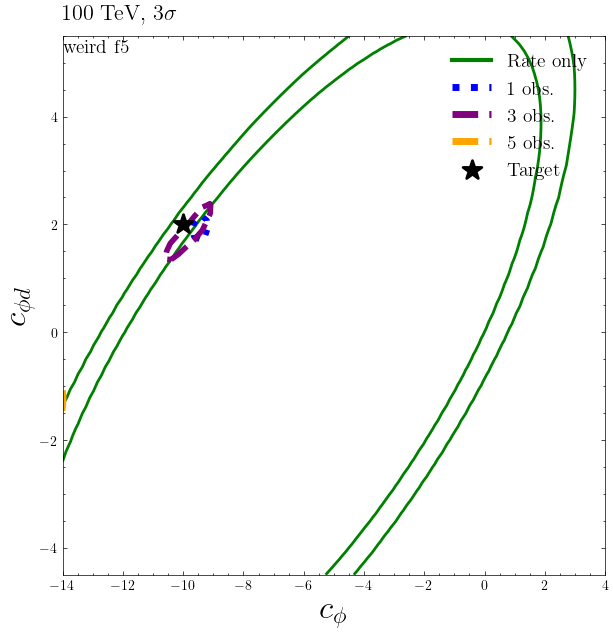


Generating plots for alt_c0c1_p3m2p0 (good)


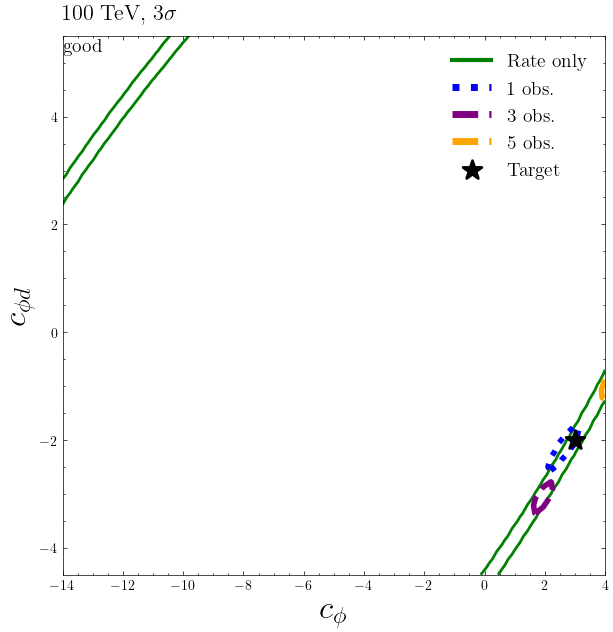


Generating plots for alt_c0c1_m4p1p0 (biased)


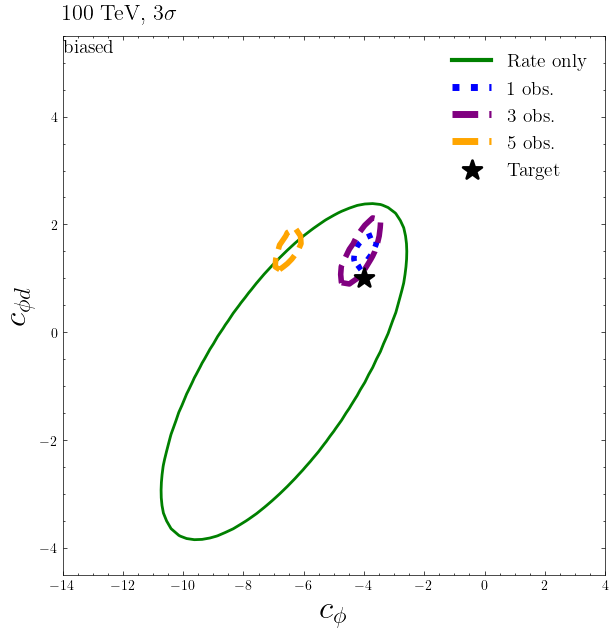


Completed generating all 3 plots for c0c1


In [8]:
# Generate plots for all configurations
lw = 3
fontsize = 14
sigma = 3

results_to_plot = ["Rate only", "1 obs.", "3 obs.", "5 obs."]

style_dicts = {
    "Rate only":{"colors":"green","linestyles":"solid","linewidths":2},
    "1 obs.":{"colors":"blue","linestyles":"dotted","linewidths":4},
    "3 obs.":{"colors":"purple","linestyles":"dashed","linewidths":4},
    "5 obs.":{"colors":"orange","linestyles":"dashed","linewidths":4},
}

style_dicts_lines = {
    "Rate only":{"color":"green","linestyle":"solid","lw":3},
    "1 obs.":{"color":"blue","linestyle":"dotted","lw":5},
    "3 obs.":{"color":"purple","linestyle":"dashed","lw":5},
    "5 obs.":{"color":"orange","linestyle":"dashed","lw":5},
}

chi2_vals = {1:{1:0.94890, # {dof:{sigma:}}
            2:3.84146,
            3:6.63490},
         2:{1:2.21733,
            2:5.99146,
            3:9.21034}
        }

# Loop through all configurations and generate plots
for test_set, config_data in all_results.items():
    print(f"\nGenerating plots for {test_set} ({config_data['description']})")
    
    # Extract data for this configuration
    results_dict = config_data["results_dict"]
    best_fits = config_data["best_fits"]
    target = config_data["target"]
    c_scans = config_data["c_scans"]
    c_grid = config_data["c_grid"]
    edges = config_data["edges"]
    
    # Determine parameter indices based on parameter_code
    marginal_0_dict = {}
    marginal_1_dict = {}

    if parameter_code[1]+parameter_code[3] == "01":
        for key in results_dict.keys():
            index0 = np.where(c_scans[0] == best_fits[key][0])[0][0]
            index1 = np.where(c_scans[1] == best_fits[key][1])[0][0]
            marginal_0_dict[key] = results_dict[key][index1,:]
            marginal_1_dict[key] = results_dict[key][:,index0]
        ind0 = 0
        ind1 = 1

    elif parameter_code[1]+parameter_code[3] == "02":
        for key in results_dict.keys():
            index0 = np.where(c_scans[0] == best_fits[key][0])[0][0]
            index2 = np.where(c_scans[2] == best_fits[key][2])[0][0]
            marginal_0_dict[key] = results_dict[key][index0,:]
            marginal_1_dict[key] = results_dict[key][:,index2]
        ind0 = 2
        ind1 = 0

    elif parameter_code[1]+parameter_code[3] == "12":
        for key in results_dict.keys():
            index1 = np.where(c_scans[1] == best_fits[key][1])[0][0]
            index2 = np.where(c_scans[2] == best_fits[key][2])[0][0]
            marginal_0_dict[key] = results_dict[key][:,index2]
            marginal_1_dict[key] = results_dict[key][index1,:]
            results_dict[key] = results_dict[key].T
        ind0 = 1
        ind1 = 2
        
    X, Y = np.meshgrid(10*c_scans[ind0], 10*c_scans[ind1])

    # Create contour plot
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))

    for i, key in enumerate(results_to_plot):
        lower_ordinate = np.max(results_dict[key]) - chi2_vals[2][sigma]
        CS = ax.contour(X, Y, results_dict[key], levels = [lower_ordinate], **style_dicts[key])
        
        # label
        ax.plot([np.NaN, np.NaN],[np.NaN, np.NaN], label = key, **style_dicts_lines[key])

    ax.scatter(10*target[ind0], 10*target[ind1], s=200, facecolors='black', edgecolors='black', linewidth = 2, label = "Target", marker = "*", zorder = 10)

    ax.set_xlabel(workflow["plotting"]["fancy_name"][f"c{ind0}"], fontsize = fontsize+10)
    ax.set_ylabel(workflow["plotting"]["fancy_name"][f"c{ind1}"], fontsize = fontsize+10)

    plt.text(0, 1.03, f"100 TeV, {sigma}$\sigma$", transform=ax.transAxes, fontsize = fontsize+2)
    plt.text(0, 0.97, f"{config_data['description']}", transform=ax.transAxes, fontsize = fontsize)

    ax.legend(frameon = False, loc = "upper right", fontsize = fontsize)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(f"plots/{parameter_code}_{test_set}_sigma{sigma}_100TeV.pdf", dpi = dpi)
    plt.show()

    plt.close()

print(f"\nCompleted generating all {len(all_results)} plots for {parameter_code}")


Generating colormap plot for alt_c0c1_m10p2p0 (weird f5)
Best fit: [-0.93714286  0.20714286  0.        ]


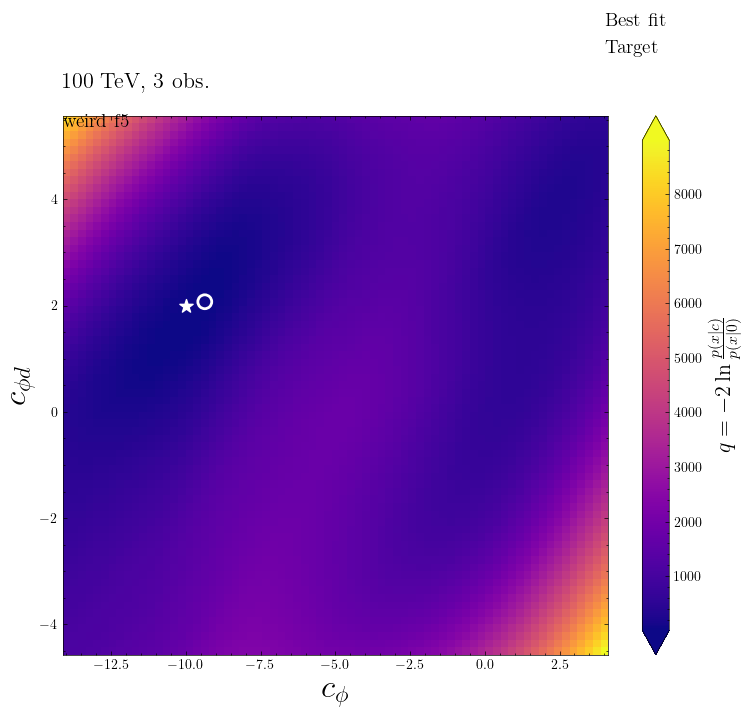


Generating colormap plot for alt_c0c1_p3m2p0 (good)
Best fit: [ 0.19428571 -0.30714286  0.        ]


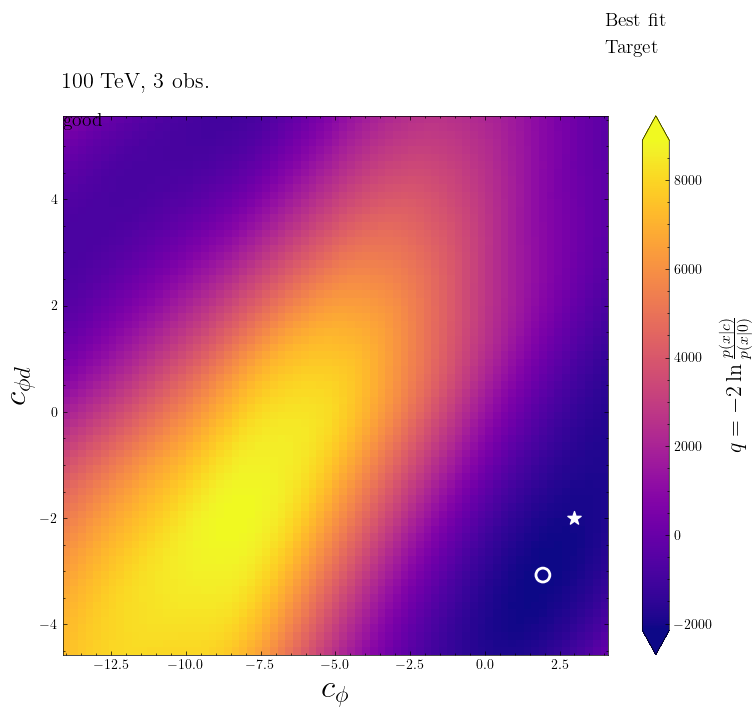


Generating colormap plot for alt_c0c1_m4p1p0 (biased)
Best fit: [-0.42285714  0.13571429  0.        ]


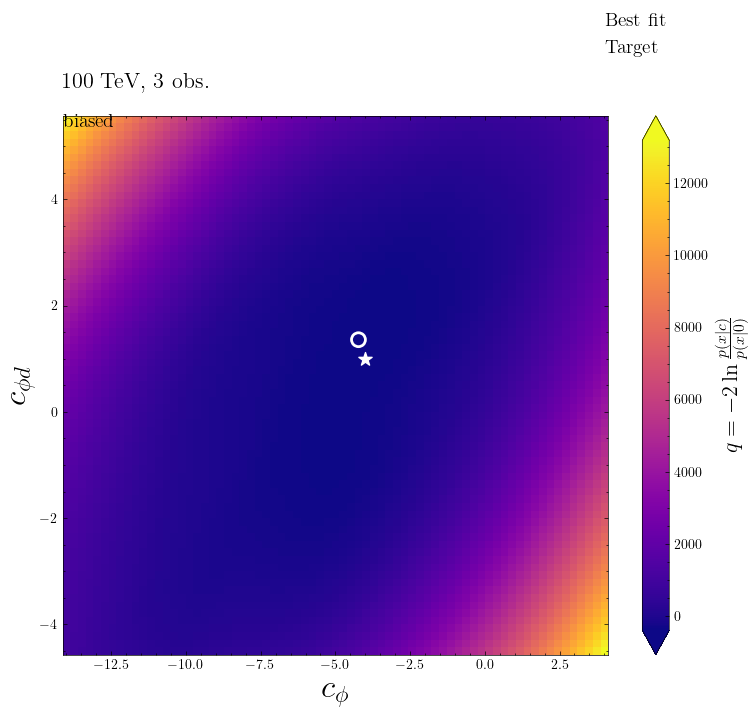


Completed generating all 3 colormap plots for c0c1


In [9]:
# Generate colormap plots for all configurations
fontsize = 14
best_fit_key = "3 obs."
cmap = "plasma"

# Loop through all configurations and generate colormap plots
for test_set, config_data in all_results.items():
    print(f"\nGenerating colormap plot for {test_set} ({config_data['description']})")
    
    # Extract data for this configuration
    results_dict = config_data["results_dict"]
    best_fits = config_data["best_fits"]
    target = config_data["target"]
    c_scans = config_data["c_scans"]
    c_grid = config_data["c_grid"]
    edges = config_data["edges"]
    
    # Determine parameter indices based on parameter_code
    if parameter_code[1]+parameter_code[3] == "01":
        ind0 = 0
        ind1 = 1
    elif parameter_code[1]+parameter_code[3] == "02":
        ind0 = 2
        ind1 = 0
    elif parameter_code[1]+parameter_code[3] == "12":
        ind0 = 1
        ind1 = 2
        # Transpose the results_dict for c1c2 case
        results_dict_transposed = {}
        for key in results_dict.keys():
            results_dict_transposed[key] = results_dict[key].T
        results_dict = results_dict_transposed
    
    print("Best fit:", best_fits[best_fit_key])
    
    plt.figure(figsize = (8.8, 7))
    
    # 2d colormesh
    pcm = plt.pcolormesh(10*edges[ind0], 10*edges[ind1], -results_dict[best_fit_key], cmap=cmap)
    cbar = plt.colorbar(pcm, extend="both")
    
    # plot best fit
    plt.scatter(10*best_fits[best_fit_key][ind0], 10*best_fits[best_fit_key][ind1], 
                linewidth = 2, s=100.0, facecolors='none', edgecolors='white', label='Best fit')
    
    # plot target
    plt.scatter(10*target[ind0], 10*target[ind1], s=100, marker="*", color="white", label='Target')
    
    plt.xlabel(workflow["plotting"]["fancy_name"][f"c{ind0}"], fontsize = fontsize+10)
    plt.ylabel(workflow["plotting"]["fancy_name"][f"c{ind1}"], fontsize = fontsize+10)
    cbar.set_label(r"$q=-2\ln\frac{p(x|c)}{p(x|0)}$", fontsize = fontsize+2)
    
    plt.legend(fontsize = fontsize, bbox_to_anchor=(1., 1.15), loc = "center")
     
    ax = plt.gca()
    plt.text(0.0, 1.05, f"100 TeV, {best_fit_key}", transform=ax.transAxes, fontsize = fontsize+2)
    plt.text(0.0, 0.98, f"{config_data['description']}", transform=ax.transAxes, fontsize = fontsize)
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(f"plots/ll_{parameter_code}_{test_set}_sigma{sigma}_100TeV.pdf", dpi = dpi)
    plt.show()
    
    plt.close()

print(f"\nCompleted generating all {len(all_results)} colormap plots for {parameter_code}")